## Computer Vision & Convulational Neural Networks with PyTorch

![Computer Vision](vision1.png)

What are we going to cover?
    
    * Getting a vision dataset to work with using torchvision.datasets
    * Architecture of a convolutional neural network (CNN) with PuTorch
    * An end to end multi class image classification problem
    * Steps in Modelling with CNNs in PyTorch:
        1. Creating a CNN model with PyTorch
        2. Picking a loss and optimizer
        3. Training a model
        4. Evaluating a model
        
 ![Input and Output](vision2.png)

### What is a convolutional neural network?

Convolutional layer performs convolving window operations across an image or a tensor.

![CNN](vision3.png)

### Table of Contents
0. [Computer vision libraries in PyTorch](#libraries)
1. [Getting a dataset](#dataset)
    * 1.1 [Check input and output shapes of data](#shapes)
    * 1.2 [Visualising our Data](#visualise)
2. [Prepare DataLoader](#prepare)
3. [Model 0: Build a Baseline model](#baseline)
    * 3.1 [Setup loss, optimizer and evaluation metrics](#setup-loss)
    * 3.2 [Creating a function to time our experiments](#time)
    * 3.3 [Creating a training loop and training a model on batches of data](#batch-train)
4. [Make predictions and get Model 0 results](#predictions)
5. [Setup device agnostic code (for using a GPU if there is one)](#setup)
6. [Model 1: Building a model with non-linearity](#non-linearity)
    * 6.1 [Setup loss, optimizer and evaluation metric](#evaluate)
    * 6.2 [Functionizing training and evaluation/testing loops](#loop)
7. [Model 2: Building a Convolutional Neural Network (CNN)](#cnn)
    * 7.1 [Stepping through `nn.Conv2d()`](#step)
    * 7.2 [Stepping through `nn.MaxPool2d()`](#maxpool)
    * 7.3 [Setup a loss function and optimizer for `model_2`](#model_2_loss)
    * 7.4 [Training and testing `model_2` using our training and test functions](#model_2_train)
8. [Compare model results and training time](#compare)
9. [Make and evaluate random predictions with best model](#random-prediction)
10. [Making a confusion matrix for further prediction evaluation](#confusion-matrix)
11. [Save and load best performing model](#save)

### 0. Computer Vision libraries in PyTorch <a class='anchor' id ='libraries'>

* `torchvision` : base domain library for PyTorch computer vision
* `torchvision.datasets` : get datasets and data loading functions for computer vision here
* `torchvision.models`   : get pretrained computer vision models that you can leverage for your own problems.
* `torchvision.transforms` : functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` : Base dataset class for PyTorch
* `torch.utils.data.DataLoader` : Creates a PyTorch iterable over a dataset


In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # ToTensor() : convert a PIL image or numpy.ndarray to tensor

# Import matplotlib for visualisation
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.1
0.15.2


### 1. Getting a dataset <a class='anchor' id ='dataset'>
    
The dataset we'll be using is FashionMNIST from `torchvision.datasets`

In [2]:
# Setup training data
from torchvision import datasets
train_data   = datasets.FashionMNIST(
    root     = "data", # where to download data to? 
    train    = True,   # do we want the training dataset?
    download = True,   # do we want to download yes/no?
    transform= torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform = None # how do we want to transform the labels/targets?
)

test_data    = datasets.FashionMNIST(
    root     = "data",
    train    = False,
    download = True,
    transform= ToTensor(),
    target_transform = None
)

In [3]:
# Aim: Build a computer vision model to find patterns in the training data and then use those patterns to predict on the test
len(train_data) , len(test_data) # working on 60000 images of clothing

(60000, 10000)

In [4]:
# See the first training example

# Visualising image as numbers
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
# Returns dictionary of different labels and their corresponding index
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets # labels

tensor([9, 0, 0,  ..., 3, 0, 5])

#### 1.1 Check input and output shapes of data <a class='anchor' id ='shapes'>

In [8]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

# Greyscale image has one color channel

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


#### 1.2 Visualising our data <a class='anchor' id ='visualise'>

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

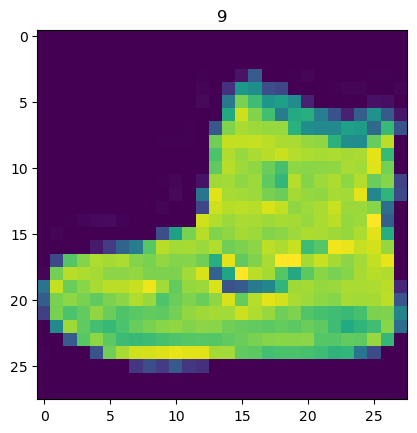

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # matplotlib expects just height and width as dimension or color channel to be last i.e  height, width, color_channel
plt.title(label)
#image

(-0.5, 27.5, 27.5, -0.5)

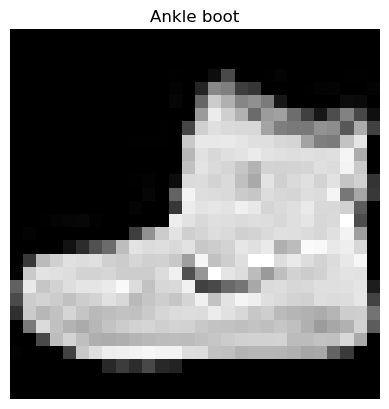

In [10]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

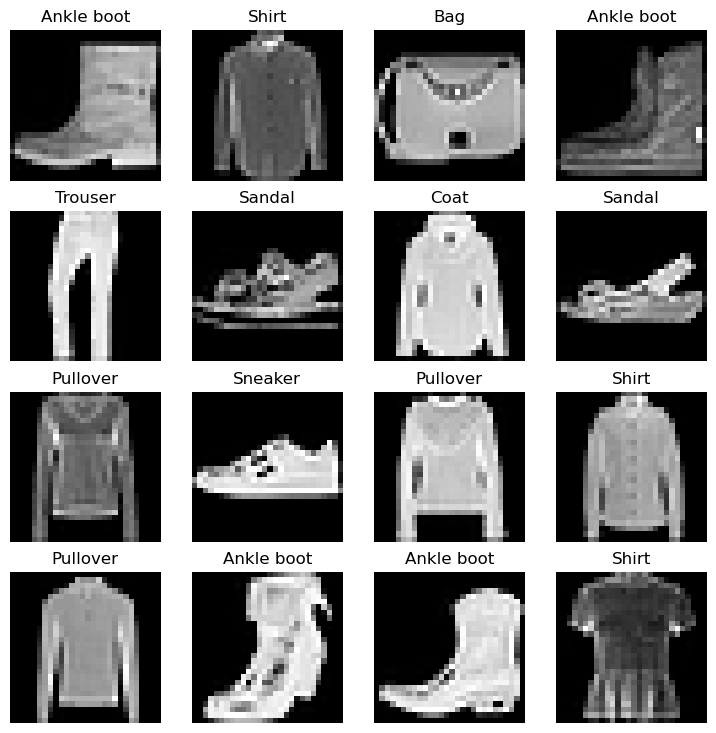

In [11]:
# Generating random images

# Plot more images 
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img , label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap = "gray")
    plt.title(class_names[label])
    plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### 2. Prepare DataLoader<a class='anchor' id ='prepare'>
    
Right now, our data is in the form of PyTorch Datasets. 
    
Dataloader turns our dataset into a Python iterable
    
More specifically we wnat to turn our data into batches (or mini-batches)
    
Why do we do it?
* 1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32)
    
* 2. It gives our neural network more chances to update its gradients per epoch.
    

In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables(batches)
train_dataloader = DataLoader(dataset    = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle    = True)

test_dataloader  = DataLoader(dataset    = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle    = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x13d904e90>,
 <torch.utils.data.dataloader.DataLoader at 0x13db4fd90>)

In [14]:
# Let's check out what we have created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader : {len(test_dataloader)}  batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x13d904e90>, <torch.utils.data.dataloader.DataLoader object at 0x13db4fd90>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader : 313  batches of 32...


In [15]:
# Check out what's inside the training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


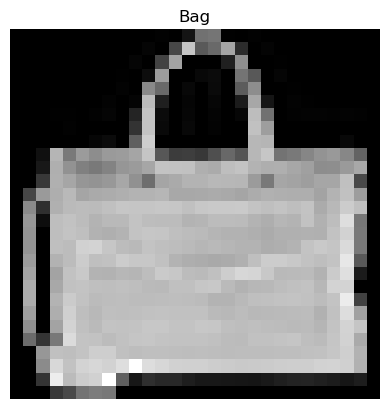

In [16]:
# Show a random sample image from a particular batch that we created

# Show a sample
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
# Getting image and label at a random index within the batch
img ,label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

### 3. Model 0: Build a Baseline model<a class='anchor' id ='baseline'>
    
When starting to build a series of machine learning modelling experiments, it's best  practice to start with a baseline model.
    
A baseline model is a simple model you will try and improve upon with subsequent models/experiments.
    
In other words start simply and add complexity when necessary.

In [17]:
# Creating a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening : {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening : torch.Size([1, 784]) -> [color_channels, height*width]


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape :  int,
                 hidden_units:  int,
                 output_shape:  int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape,
                      out_features= hidden_units),
            nn.Linear(in_features = hidden_units,
                      out_features= output_shape)
        )
        
    def forward(self,x):
            return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, # this is 28*28
    hidden_units= 10,  # how many units in the hiddden layer
    output_shape= len(class_names) # one for every class
    ).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape # 1 logit per class

torch.Size([1, 10])

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

#### 3.1 Setup loss, optimizer and evaluation metrics<a class='anchor' id ='setup-loss'>
    
* Loss function - Since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - Our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation Metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [22]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download...


In [23]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn   = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr     = 0.1)

#### 3.2 Creating a function to time our experiments<a class='anchor' id ='time'>
    
Machine Learning is very experimental.
   
Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values)
2. How fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start : float,
                     end   : float,
                     device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [25]:
start_time = timer()
# some code..
end_time   = timer()
print_train_time(start = start_time, end = end_time, device = "cpu")

Train time on cpu: 0.000 seconds


1.3541997759602964e-05

#### 3.3 Creating a training loop and training a model on batches of data<a class='anchor' id ='batch-train'>
    
    1. Loop through epochs.
    2. Loop through training batches, perform training steps, calculate the train loss *per batch*
    3. Loop through testing batches, perform testing steps, calculate the test loss *per btach*
    4. Print out what's happening
    5. Time it all (for fun)

In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n-----")
    ## Training
    train_loss = 0
    # Add a loop to loop through the training batches
    # enumerate : Keeps track of number of batches we have been through
    for batch, (X,y) in enumerate(train_dataloader): # X: image, y:labels
        model_0.train()
        # 1. Forward Pass
        y_pred = model_0(X)
        
        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        # Print out what's happenin'
        if batch % 400 == 0 :
            print(f"Looked at: {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
            
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader) # average loss per epoch
    
    ## Testing
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            # 1. Forward Pass
            test_pred = model_0(X_test)
            
            # 2. Calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)
            
            # 3. Calculate accuracy
            test_acc  += accuracy_fn(y_true = y_test,
                                     y_pred = test_pred.argmax(dim = 1))
            
        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)
        
        # Calculate the test acc average per batch
        test_acc  /= len(test_dataloader)
        
    # Print out what's happenin
    print(f"\nTrain loss:{train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")
    
# Calculate the training time
train_time_end_on_cpu    = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end   = train_time_end_on_cpu,
                                            device= str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-----
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train loss:0.5904 | Test loss: 0.5095 | Test acc: 82.0387
Epoch 1
-----
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train loss:0.4763 | Test loss: 0.4799 | Test acc: 83.1969
Epoch 2
-----
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train loss:0.4550 | Test loss: 0.4766 | Test acc: 83.4265
Train time on cpu: 9.488 seconds


### 4. Make predictions and get Model 0 results <a class='anchor' id ='predictions'>

In [27]:
torch.manual_seed(42)
def eval_model(model       : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn     : torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc  += accuracy_fn(y_true = y,
                                y_pred = y_pred.argmax(dim = 1))
            
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc  /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc" : acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model       = model_0,
                             data_loader = test_dataloader,
                             loss_fn     = loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### 5. Setup device agnostic code (for using a GPU if there is one)<a class='anchor' id ='setup'>

In [28]:
torch.cuda.is_available()

False

In [29]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 6. Model 1: Building a model with non-linearity<a class='anchor' id ='non-linearity'>
    

In [30]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape : int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
                nn.Flatten(), #flatten inputs into a single vector
                nn.Linear(in_features = input_shape,
                          out_features= hidden_units),
                nn.ReLU(),
                nn.Linear(in_features = hidden_units,
                          out_features= output_shape),
                nn.ReLU()
        )
        
    def forward(self,x: torch.Tensor):
        return self.layer_stack(x)

In [31]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784, #this is the output of the flatten layer after our 28*28 image goes in
                              hidden_units= 10,
                              output_shape= len(class_names)
                             ).to(device) # send to the GPU if it's available
next(model_1.parameters()).device

device(type='cpu')

#### 6.1 Setup loss, optimizer and evaluation metrics<a class='anchor' id ='evaluate'>
    

In [32]:
from helper_functions import accuracy_fn
loss_fn   = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params = model_1.parameters(), # tries to update our model's parameters to reduce the loss 
                            lr = 0.1)

#### 6.2 Functionizing training and evaluation/testing loops<a class='anchor' id ='loop'>
    
Let's create a function for:
* Training loop - `train_step()`
* Testing loop  - `test_step()`

In [33]:
def train_step(model       : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn     : torch.nn.Module,
               optimizer   : torch.optim.Optimizer,
               accuracy_fn,
               device      : torch.device = device):
    """Performs training with model trying to learn on data loader"""
    train_loss, train_acc = 0, 0 
    
    # Put model into training mode
    model.train()
    
    # Add a loop to loop through the training batches
    # enumerate : Keeps track of number of batches we have been through
    for batch, (X,y) in enumerate(data_loader): # X: image, y:labels
        # Put data on target device
        X, y = X.to(device), y.to(device)
        
        model.train()
        # 1. Forward Pass (outputs raw logits from the model)
        y_pred = model(X)
        
        # 2. Calculate the loss and accuracy(per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc  += accuracy_fn(y_true = y,
                                  y_pred = y_pred.argmax(dim = 1)) # go from logits -> prediction labels
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader) # average loss per epoch
    train_acc  /= len(data_loader)
    
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [34]:
def test_step(model      : torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn    : torch.nn.Module,
              accuracy_fn,
              device     : torch.device = device):
    """Performs a testing loop step on model going over data_loader"""
    test_loss, test_acc = 0,0
    
    # Put the model in eval mode
    model.eval()
    # Turn on inference mode context manager
    with torch.inference_mode():
        for X,y in data_loader:
            # Send the data to the target device
            X,y = X.to(device), y.to(device)
            
            # 1. Forward Pass (outputs raw logits)
            test_pred = model(X)
            
            # 2. Calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred, y)
            
            # 3. Calculate accuracy
            test_acc  += accuracy_fn(y_true = y,
                                     y_pred = test_pred.argmax(dim = 1)) # go from logits -> prediction labels
            
        # Calculate the test loss average per batch
        test_loss /= len(data_loader)
        
        # Calculate the test acc average per batch
        test_acc  /= len(data_loader)
        
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")
        

In [35]:
torch.manual_seed(42)

# Measure time 
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")
    train_step(model       = model_1,
               data_loader = train_dataloader,
               loss_fn     = loss_fn,
               optimizer   = optimizer,
               accuracy_fn = accuracy_fn,
               device      = device)
    
    test_step(model        = model_1,
              data_loader  = test_dataloader,
              loss_fn      = loss_fn,
              accuracy_fn  = accuracy_fn,
              device       = device)
    

train_time_end_on_gpu      = timer()
total_train_time_model_1   = print_train_time(start = train_time_start_on_gpu,
                                              end   = train_time_end_on_gpu,
                                              device= device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
----------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
----------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cpu: 9.686 seconds


**Note:** Sometimes, depending on your data/ hardware you might find that your model trains faster on CPU than GPU.

Why is this?
1. It could be that the overhead for copying data/ model to and from the GPU outweights the compute benefits offered by the GPU.
2. The hardware you're using has a better CPU in terms of compute capability than the GPU.

In [36]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [37]:
total_train_time_model_0

9.488229832990328

In [38]:
torch.manual_seed(42)
def eval_model(model       : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn     : torch.nn.Module,
               accuracy_fn,
               device      : device):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # Make our data device agnostic
            X, y = X.to(device), y.to(device)
            
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc  += accuracy_fn(y_true = y,
                                y_pred = y_pred.argmax(dim = 1))
            
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc  /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc" : acc}


In [39]:
# Get model_1 results dictionary
model_1_results = eval_model(model       = model_1,
                             data_loader = test_dataloader,
                             loss_fn     = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device      = device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

### 7. Model 2: Building a Convolutional Neural Network (CNN) <a class='anchor' id ='cnn'>
    
    CNN's are also known as ConvNets
    CNN's are known for their capabilities to find patterns in visual data
    
![CNN](vision4.png)

![CNN Explainer](vision5.png)

In [136]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG model from CNN explainer website.
    """
    
    def __init__(self,  input_shape   : int, 
                        hidden_units  : int,
                        output_shape  : int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            # Create a conv layer
            nn.Conv2d(in_channels = input_shape,
                      out_channels= hidden_units,
                      kernel_size = 3,
                      stride      = 1,
                      padding     = 1), # values we can set ourselves in our NN's are called hyperparameters(kernel size, stride, padding)
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels= hidden_units,
                      kernel_size = 3,
                      stride      = 1,
                      padding     = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = (2,2))
        
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels= hidden_units,
                      kernel_size = 3,
                      stride      = 1,
                      padding     = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels= hidden_units,
                      kernel_size = 3,
                      stride      = 1,
                      padding     = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*7*7, # there's a trick to calculating this...
                      out_features= output_shape)
        )
        
    def forward(self,x):
        x = self.conv_block_1(x)
#         x = x.unsqueeze(0)
#         print(f"Output shape of conv_block_1: {x.shape}")
        x = x = self.conv_block_2(x)
#         x.unsqueeze(0)
#         print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
#         print(f"Output shape of classifier  : {x.shape}")
        return x
    


In [137]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1, # for colored image we give an input shape of 3
                              hidden_units= 10,
                              output_shape= len(class_names)).to(device)

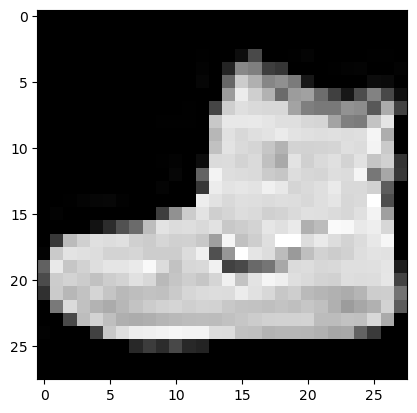

In [138]:
plt.imshow(image.squeeze(),cmap="gray")

In [139]:
rand_image_tensor = torch.randn(size = (1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [140]:
# Pass image through Conv2d model
# model_2(image)

#### 7.1 Stepping through `nn.Conv2d()`  <a class='anchor' id ='step'>
    
![Conv2d](vision6.png)

In [141]:
torch.manual_seed(42)

# Create a batch of images
images     = torch.randn(size = (32,3,64,64))
test_image = images[0]

print(f"Image batch shape : {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n       {test_image}")

Image batch shape : torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
       tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

     

In [142]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels  = 3, # Since test image has 3 color channels
                       out_channels = 10,
                       kernel_size  = (3,3),
                       stride       = 1, # skip 1 pixel at a time
                       padding      = 0
                       )

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [143]:
test_image.shape

torch.Size([3, 64, 64])

#### 7.2 Stepping through `nn.MaxPool2d()` <a class='anchor' id ='maxpool'>

In [144]:
# Applies a 2D max pooling over an input signal composed of several input planes.
test_image.shape

torch.Size([3, 64, 64])

In [145]:
# Print out the original image shape without unsqueezed dimension
print(f"Test image original shape            : {test_image.shape}")
print(f"Test image with unsqueezed dimension : {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass data through just the conv_layer
# kernel size of 3x3 in the convolutional layer, which reduces the height and width of the feature maps by 2 pixels in each dimension due to the convolution operation.
test_image_through_conv = conv_layer(test_image.unsqueeze(dim = 0))
print(f"Shape after going through conv layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
# The max-pooling layer downsamples each feature map independently by selecting the maximum value within each pooling window.
# After passing through the max-pooling layer (max_pool_layer), the height and width of each feature map are halved because of the 2x2 pooling operation.
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")



Test image original shape            : torch.Size([3, 64, 64])
Test image with unsqueezed dimension : torch.Size([1, 3, 64, 64])
Shape after going through conv layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [146]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor   = torch.randn(size = (1,1,2,2))
print(f"\nRandom Tensor:\n   {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")
# Create a max pool layer
max_pool_layer  = nn.MaxPool2d(kernel_size = 2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n   {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")



Random Tensor:
   tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
   tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


#### 7.3 Setup a loss function and optimizer for `model_2` <a class='anchor' id ='model_2_loss'>

In [147]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn   = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr     = 0.1)

#### 7.4 Training and testing `model_2` using our training and test functions <a class='anchor' id ='model_2_train'>

In [148]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epoch = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------")
    train_step(model       = model_2,
               data_loader = train_dataloader,
               loss_fn     = loss_fn,
               optimizer   = optimizer,
               accuracy_fn = accuracy_fn,
               device      = device)
    
    test_step(model        = model_2,
              data_loader  = test_dataloader,
              loss_fn      = loss_fn,
              accuracy_fn  = accuracy_fn,
              device       = device)
    
train_time_end_model_2     = timer()
total_train_time_model_2   = print_train_time(start  = train_time_start_model_2,
                                              end    = train_time_end_model_2,
                                              device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Train loss: 0.59355 | Train acc: 78.48%
Test loss: 0.40828 | Test acc: 85.40%

Epoch: 1
-----------
Train loss: 0.36563 | Train acc: 86.82%
Test loss: 0.36302 | Test acc: 86.39%

Epoch: 2
-----------
Train loss: 0.32580 | Train acc: 88.16%
Test loss: 0.33149 | Test acc: 87.95%

Train time on cpu: 118.262 seconds


In [149]:
# Get model_2 results
model_2_results = eval_model(
    model       = model_2,
    data_loader = test_dataloader,
    loss_fn     = loss_fn,
    accuracy_fn = accuracy_fn,
    device      = device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.331485778093338,
 'model_acc': 87.94928115015975}

In [150]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### 8. Compare model results and training time <a class='anchor' id ='compare'>

In [152]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.331486,87.949281


In [153]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,9.488230
1,FashionMNISTModelV1,0.685001,75.019968,9.686288
2,FashionMNISTModelV2,0.331486,87.949281,118.261929


Text(0, 0.5, 'model')

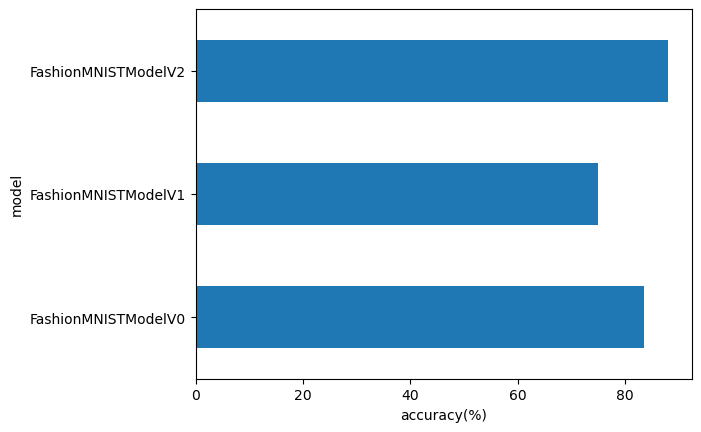

In [155]:
# Visulaize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind = "barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

### 9. Make and evaluate random predictions with best model<a class='anchor' id ='random-prediction'>

In [157]:
def make_predictions( model : torch.nn.Module,
                      data  : list,
                      device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample (add a batch dimension and pass to target device)
            sample     = torch.unsqueeze(sample, dim = 0).to(device)
            
            # Forward Pass (model outputs raw logits)
            pred_logit = model(sample)
            
            # Get prediction probability (logit -> prediction probability)
            pred_prob  = torch.softmax(pred_logit.squeeze(), dim = 0)
            
            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
        # Stack the pred_probs to turn list into a tensor
        return torch.stack(pred_probs)

In [161]:
img, label = test_data[0][:10]
# Returns an image tensor with an associated label
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [171]:
import random
# random.seed(42)
test_samples = []
test_labels  = []
for sample,label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

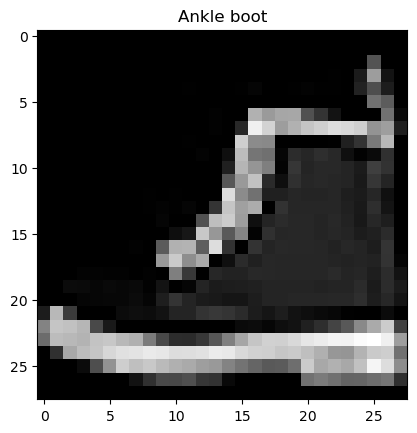

In [172]:
plt.imshow(test_samples[0].squeeze(), cmap = "gray")
plt.title(class_names[test_labels[0]])

In [173]:
# Make predictions
pred_probs = make_predictions(model = model_2,
                              data  = test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[1.6398e-04, 8.4936e-05, 1.4965e-05, 2.3806e-04, 4.8725e-05, 2.4149e-02,
         2.7028e-05, 2.3688e-02, 7.0960e-02, 8.8063e-01],
        [1.0135e-04, 1.0138e-05, 6.1232e-05, 1.2099e-05, 4.5120e-06, 1.2093e-03,
         2.4211e-05, 9.4808e-01, 9.9201e-04, 4.9505e-02]])

In [174]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

In [175]:
test_labels

[9, 7, 2, 0, 1, 0, 4, 5, 4]

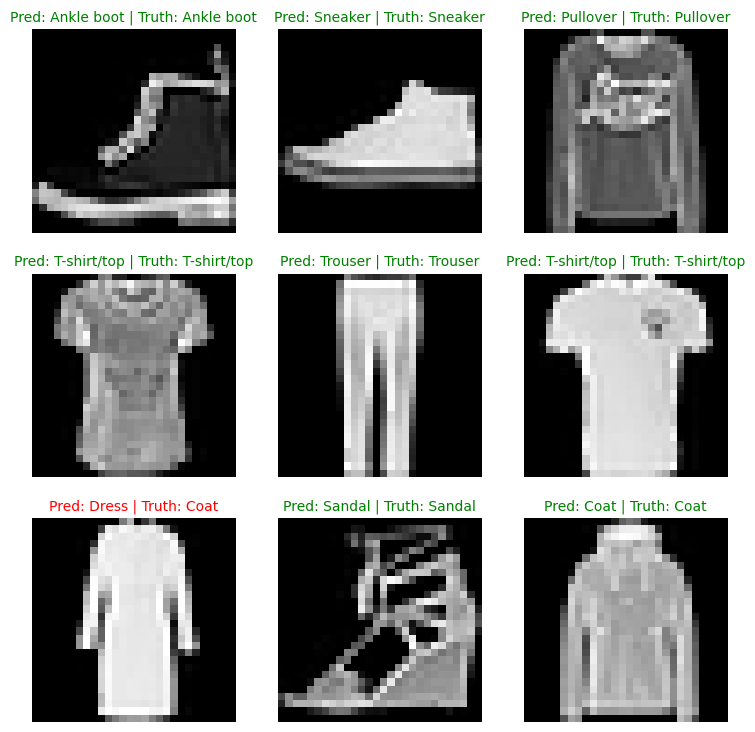

In [176]:
# Plot predictions
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)
    
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap= "gray")
    
    # Find the prediction (in text form, e.g "Sandal")
    pred_label  = class_names[pred_classes[i]]
    
    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]
    
    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    
    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize = 10, c = "g") # green text if prediction same as truth
    else:
        plt.title(title_text, fontsize = 10, c = "r")
        
    plt.axis(False)
    

### 10. Making a confusion matrix for further prediction evaluation<a class='anchor' id ='confusion-matrix'>
    
A confusion matrix is a fantastic way of evaluating your classification models visually.
    
    1. Make predictions with our trained model on the test dataset.
    2. Make a confusion matrix `torchmetric.ConfusionMatrix`
    3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [182]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval() 
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc = "Making predictions..."):
        # Send the data and target to target device
        X,y = X.to(device) , y.to(device)
        # Do the forward pass
        y_logit = model_2(X)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred  = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim = 1)

        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())
        
# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds) # Turns the list of tensors into a single tensor
y_pred_tensor[:10]
    


Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [183]:
len(y_pred_tensor)

10000

In [185]:
import torchmetrics
import mlxtend

In [190]:
test_data.classes, test_data.targets

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 tensor([9, 2, 1,  ..., 8, 1, 5]))

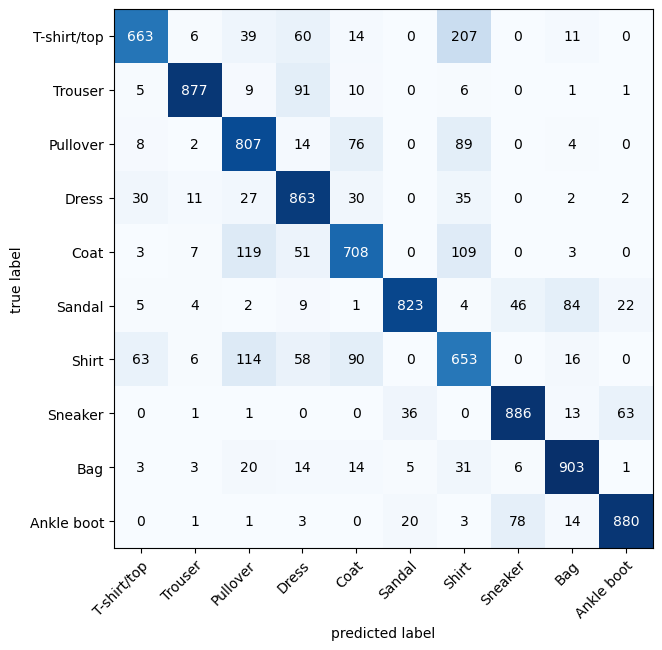

In [194]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

task = "MULTICLASS"
# 2. Setup confusion matrix instance and compare predictions to targets
confmat        = ConfusionMatrix(num_classes = len(class_names), task = task)
confmat_tensor = confmat(preds  = y_pred_tensor,
                         target = test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat   = confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names= class_names,
    figsize    = (10,7)
)

### 11. Save and load best performing model <a class='anchor' id ='save'>
    

In [197]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents  = True,
                 exist_ok = True)

# Create model save
MODEL_NAME      = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),
           f   = MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [198]:
# Create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape  = 1,
                                     hidden_units = 10,
                                     output_shape = len(class_names)
                                    )

# Loaded in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [199]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.331485778093338,
 'model_acc': 87.94928115015975}

In [202]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model       = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn     = loss_fn,
    accuracy_fn = accuracy_fn,
    device      = device
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.331485778093338,
 'model_acc': 87.94928115015975}

In [205]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol = 1e-02) # tolerance

tensor(True)